# Projekt: Algorithmischer-Handel

Das Projekt Algorithmischer Handel basierend auf die Klassifikation automatisierte Handelsstrategien zu entwickeln.
Die Kauf- und Verkaufsentscheidung soll basierend auf den historischen und Echtzeit-Marktdaten funktionieren.
Die Klassifikation generiert die Vohersage, um dann zu schauen, ob die Aktie gekauft(long) oder verkauft(short) werden soll.

Das Projekt muss unter folgenden Schritte aufgeteilt werden:
1. Die Datenbeschaffung und aufbereitung
2. Datenanalyse
3. Vorbereitung der Trainingsdaten
4. Modellierung
5. Bewertimg der Genauigkeit und Zuverlässigkeit der entwickelten Methode
6. Backtesting mit Historiche Daten

# 1. Datenbeschaffung und aufbereitung

<h2>1.1 Datenbeschaffung</h2>

Es müssen einige Bibliotheken hinzugefügt werden. 
Als erstes muss yfinance hinzugefügt werden, diese ermöglich den zugriff auf Aktiendaten zuzugreifen.

In [1]:
!pip install yfinance pandas

Nachdem die benötigten Bibliotheken hinzugefügt wurden müssen diese importiert werden

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import webbrowser

Der user soll die möglichkeit bekommen selber die Aktie zu bestimmen, dennoch wird eine Validierung eingebaut die überprüft, ob die Aktie vorhanden ist oder nicht

In [3]:
#stock = input("Geben Sie bitte die Aktienkürzel ein: ").upper()
stock = "AMZN"
stock_info =  yf.Ticker(stock).info
try:
        if 'shortName' in stock_info and stock_info['shortName']:
            print(f"Die Aktie lautet: {stock_info['shortName']}")
            print(stock_info)
            url = 'https://de.tradingview.com/chart/?symbol=NASDAQ%3AAMZN'
            webbrowser.open(url)
        else:
            raise Exception (f"Die Aktie: {stock} ist nicht vorhanden")
except Exception as err:
        print(err)

Die Aktie lautet: Amazon.com, Inc.
{'address1': '410 Terry Avenue North', 'city': 'Seattle', 'state': 'WA', 'zip': '98109-5210', 'country': 'United States', 'phone': '206 266 1000', 'website': 'https://www.aboutamazon.com', 'industry': 'Internet Retail', 'industryKey': 'internet-retail', 'industryDisp': 'Internet Retail', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': "Amazon.com, Inc. engages in the retail sale of consumer products, advertising, and subscriptions service through online and physical stores in North America and internationally. The company operates through three segments: North America, International, and Amazon Web Services (AWS). It also manufactures and sells electronic devices, including Kindle, Fire tablets, Fire TVs, Echo, Ring, Blink, and eero; and develops and produces media content. In addition, the company offers programs that enable sellers to sell their products in its stores; and pr

Nachdem die Validation steht kann mit der Variable "stock_info" die Daten heruntergeladen werden.
Hierzu werden die Daten vom aktuellen Tag bis vor einem Jahr verwendet.

In [4]:
print("---Metadaten---")
print(stock_info['symbol'])
print(datetime.today().strftime('%Y-%m-%d'))
print((datetime.today().replace(year=datetime.today().year - 1)).strftime('%Y-%m-%d'))
try:
    stock_data = yf.download(
                    stock_info['symbol'],
                    start = (datetime.today().replace(year=datetime.today().year - 1)).strftime('%Y-%m-%d'), 
                    end=datetime.today().strftime('%Y-%m-%d'))
except Exception as err:
    print(f"Das Herunterladen der Datei war nicht erfolgreich: {err}")
print(f"--------------------------Aktiendaten von {stock_info['shortName']}--------------------------")
print(stock_data)
print(f"------------------------------------------------------------------------------------")

---Metadaten---
AMZN
2024-07-11
2023-07-11


[*********************100%%**********************]  1 of 1 completed

--------------------------Aktiendaten von Amazon.com, Inc.--------------------------
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-07-11  127.750000  129.770004  127.349998  128.779999  128.779999   
2023-07-12  130.309998  131.259995  128.830002  130.800003  130.800003   
2023-07-13  134.039993  134.669998  132.710007  134.300003  134.300003   
2023-07-14  134.059998  136.649994  134.059998  134.679993  134.679993   
2023-07-17  134.559998  135.619995  133.210007  133.559998  133.559998   
...                ...         ...         ...         ...         ...   
2024-07-03  199.940002  200.029999  196.759995  197.589996  197.589996   
2024-07-05  198.649994  200.550003  198.169998  200.000000  200.000000   
2024-07-08  200.039993  201.199997  197.960007  199.289993  199.289993   
2024-07-09  199.399994  200.570007  199.050003  199.339996  199.339996   
2024-07-10  199.994995  200

Durch die erlangten können wir festhalten das wir folgende Werte erhalten:
1. Date: Aktienwerte für den tag
2. Open: Der Eröffnungskurs der Aktie 
3. High: Der höchste Kurs der Aktie der am diesem Tag stattgefunden hast
4. Low:  Der niedrigste Kurs der Aktie der am diesem Tag stattgefunden hast
5. Adj Close: Dieser Kurs zeigt den gereinigt Schlusskurs an mit berücksichtigung auf die Dividende, Aktiensplits etc.
6. Volume: Die Anzahl der gehandelten Aktien

In [5]:
stock_data.ffill(inplace=True)

Mit dem Befehl wurde die Datei Bereinigt und passend Convertiert

In [6]:
# Relevante Merkmale auswählen
stock_data['ReturnOnCapital'] = stock_data['Close'].pct_change()
stock_data.dropna(inplace=True)
stock_data

,Open,High,Low,Close,Adj Close,Volume,ReturnOnCapital
Date,,,,,,,
2023-07-12,130.309998,131.259995,128.830002,130.800003,130.800003,54022800,0.015686
2023-07-13,134.039993,134.669998,132.710007,134.300003,134.300003,61170900,0.026758
2023-07-14,134.059998,136.649994,134.059998,134.679993,134.679993,54388100,0.002829
2023-07-17,134.559998,135.619995,133.210007,133.559998,133.559998,48450200,-0.008316
2023-07-18,132.710007,133.860001,131.350006,132.830002,132.830002,54969100,-0.005466
...,...,...,...,...,...,...,...
2024-07-03,199.940002,200.029999,196.759995,197.589996,197.589996,31597900,-0.012050
2024-07-05,198.649994,200.550003,198.169998,200.000000,200.000000,39858900,0.012197
2024-07-08,200.039993,201.199997,197.960007,199.289993,199.289993,34767300,-0.003550


In [7]:
# Berechnung der Weighted Moving Averages
def weighted_moving_average(data, window):
    weights = np.arange(1, window + 1)
    wma = data.rolling(window=window).apply(lambda prices: np.dot(prices, weights) / weights.sum(), raw=True)
    return wma
    
# Berechnung des Hull Moving Averages
def hull_moving_average(data, window):
    half_length = int(window / 2)
    sqrt_length = int(np.sqrt(window))
    wma1 = 2 * data.rolling(window=half_length).mean() - data.rolling(window=window).mean()
    hma = wma1.rolling(window=sqrt_length).mean()
    return hma
# Berechnung der gleitenden Durchschnitte
stock_data['SMA_20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['WMA_20'] = weighted_moving_average(stock_data['Close'], 20)
stock_data['WMA_50'] = weighted_moving_average(stock_data['Close'], 50)
stock_data['HMA_20'] = hull_moving_average(stock_data['Close'], 20)
stock_data['HMA_50'] = hull_moving_average(stock_data['Close'], 50)
stock_data.head(30)

,Open,High,Low,Close,Adj Close,Volume,ReturnOnCapital,SMA_20,SMA_50,WMA_20,WMA_50,HMA_20,HMA_50
Date,,,,,,,,,,,,,
2023-07-12,130.309998,131.259995,128.830002,130.800003,130.800003,54022800,0.015686,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-13,134.039993,134.669998,132.710007,134.300003,134.300003,61170900,0.026758,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-14,134.059998,136.649994,134.059998,134.679993,134.679993,54388100,0.002829,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-17,134.559998,135.619995,133.210007,133.559998,133.559998,48450200,-0.008316,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-18,132.710007,133.860001,131.350006,132.830002,132.830002,54969100,-0.005466,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-19,133.389999,135.990005,132.529999,135.360001,135.360001,54531000,0.019047,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-20,134.070007,134.789993,129.330002,129.960007,129.960007,59820600,-0.039894,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-21,131.339996,131.369995,128.419998,130.000000,130.000000,133265000,0.000308,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-24,130.309998,131.660004,128.350006,128.800003,128.800003,45591100,-0.009231,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Generierung von Kauf- und Verkaufssignalen
stock_data['Signal_SMA'] = 0  # Initialisieren der Signalspalte
stock_data['Signal_HMA'] = 0  # Initialisieren der Signalspalte
stock_data['Signal_WMA'] = 0  # Initialisieren der Signalspalte

# Kaufsignal: Wenn SMA_20 > SMA_50 und ReturnOnCapital positiv ist
stock_data.loc[(stock_data['SMA_20'] > stock_data['SMA_50']) & (stock_data['ReturnOnCapital'] > 0), 'Signal_SMA'] = 1
stock_data.loc[(stock_data['HMA_20'] > stock_data['HMA_50']) & (stock_data['ReturnOnCapital'] > 0), 'Signal_HMA'] = 1
stock_data.loc[(stock_data['WMA_20'] > stock_data['WMA_50']) & (stock_data['ReturnOnCapital'] > 0), 'Signal_WMA'] = 1

# Verkaufssignal: Wenn SMA_20 < SMA_50 und ReturnOnCapital negativ ist
stock_data.loc[(stock_data['SMA_20'] < stock_data['SMA_50']) & (stock_data['ReturnOnCapital'] < 0), 'Signal_SMA'] = -1
stock_data.loc[(stock_data['HMA_20'] < stock_data['HMA_50']) & (stock_data['ReturnOnCapital'] < 0), 'Signal_HMA'] = -1
stock_data.loc[(stock_data['WMA_20'] < stock_data['WMA_50']) & (stock_data['ReturnOnCapital'] < 0), 'Signal_WMA'] = -1

# Bestimmen der Positionen basierend auf den Signalen
stock_data['Position_SMA'] = stock_data['Signal_SMA'].diff()
stock_data['Position_HMA'] = stock_data['Signal_HMA'].diff()
stock_data['Position_WMA'] = stock_data['Signal_WMA'].diff()

stock_data.dropna(inplace=True)
print(stock_data.head(60))


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-09-28  124.040001  126.580002  123.040001  125.980003  125.980003   
2023-09-29  128.199997  129.149994  126.320000  127.120003  127.120003   
2023-10-02  127.279999  130.470001  126.540001  129.460007  129.460007   
2023-10-03  128.059998  128.520004  124.250000  124.720001  124.720001   
2023-10-04  126.059998  127.360001  125.680000  127.000000  127.000000   
2023-10-05  126.709999  126.730003  124.330002  125.959999  125.959999   
2023-10-06  124.160004  128.449997  124.129997  127.959999  127.959999   
2023-10-09  126.220001  128.789993  124.760002  128.259995  128.259995   
2023-10-10  128.820007  130.740005  128.050003  129.479996  129.479996   
2023-10-11  129.740005  132.050003  129.610001  131.830002  131.830002   
2023-10-12  132.169998  134.479996  131.229996  132.330002  132.330002   
2023-10-13  132.979996  133.309998  12

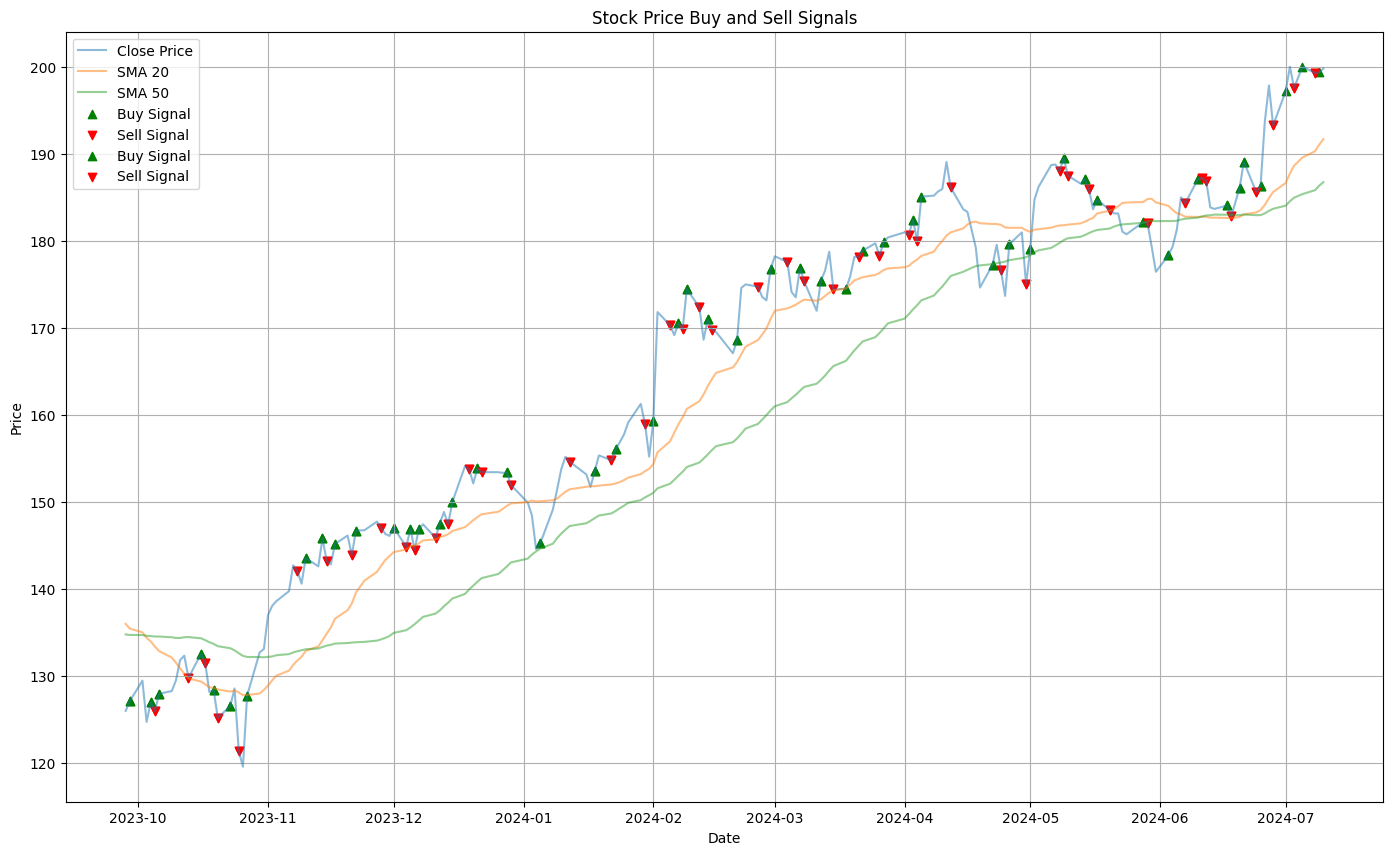

In [11]:
# Visualisierung der Signale
plt.figure(figsize=(17,10))
plt.plot(stock_data['Close'], label='Close Price', alpha=0.5)
plt.plot(stock_data['SMA_20'], label='SMA 20', alpha=0.5)
plt.plot(stock_data['SMA_50'], label='SMA 50', alpha=0.5)

# Erhalten der Indizes für Kauf- und Verkaufssignale
buy_signals = stock_data.loc[stock_data['Position_SMA'] == 1].index
sell_signals = stock_data.loc[stock_data['Position_SMA'] == -1].index
# Überprüfen der Bedingung buy_signals <= sell_signals
if len(buy_signals) <= len(sell_signals):
    # Sicherstellen, dass die Signale korrekt dargestellt werden
    plt.scatter(buy_signals, stock_data.loc[buy_signals, 'Close'], label='Buy Signal', marker='^', color='green', alpha=1)
    plt.scatter(sell_signals, stock_data.loc[sell_signals, 'Close'], label='Sell Signal', marker='v', color='red', alpha=1)
else:
    # Wenn buy_signals größer sind als sell_signals, nur die ersten sell_signals anzeigen
    plt.scatter(buy_signals[:len(sell_signals)], stock_data.loc[buy_signals[:len(sell_signals)], 'Close'], label='Buy Signal', marker='^', color='green', alpha=1)
    plt.scatter(sell_signals, stock_data.loc[sell_signals, 'Close'], label='Sell Signal', marker='v', color='red', alpha=1)

# Sicherstellen, dass die Signale korrekt dargestellt werden
plt.scatter(buy_signals, stock_data.loc[buy_signals, 'Close'], label='Buy Signal', marker='^', color='green', alpha=1)
plt.scatter(sell_signals, stock_data.loc[sell_signals, 'Close'], label='Sell Signal', marker='v', color='red', alpha=1)

plt.title('Stock Price Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Visualisierung der Signale
plt.figure(figsize=(17,7))
plt.plot(stock_data['Close'], label='Close Price', alpha=0.5)
plt.plot(stock_data['HMA_20'], label='HMA 20', alpha=0.5)
plt.plot(stock_data['HMA_20'], label='HMA 50', alpha=0.5)

# Erhalten der Indizes für Kauf- und Verkaufssignale
buy_signals = stock_data.loc[stock_data['Position_HMA'] == 1].index
sell_signals = stock_data.loc[stock_data['Position_HMA'] == -1].index

# Sicherstellen, dass die Signale korrekt dargestellt werden
plt.scatter(buy_signals, stock_data.loc[buy_signals, 'Close'], label='Buy Signal', marker='^', color='green', alpha=1)
plt.scatter(sell_signals, stock_data.loc[sell_signals, 'Close'], label='Sell Signal', marker='v', color='red', alpha=1)

plt.title('Stock Price Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Visualisierung der Signale
plt.figure(figsize=(17,7))
plt.plot(stock_data['Close'], label='Close Price', alpha=0.5)
plt.plot(stock_data['WMA_20'], label='WMA 20', alpha=0.5)
plt.plot(stock_data['WMA_50'], label='WMA 50', alpha=0.5)

# Erhalten der Indizes für Kauf- und Verkaufssignale
buy_signals = stock_data.loc[stock_data['Position_WMA'] == 1].index
sell_signals = stock_data.loc[stock_data['Position_WMA'] == -1].index

# Sicherstellen, dass die Signale korrekt dargestellt werden
plt.scatter(buy_signals, stock_data.loc[buy_signals, 'Close'], label='Buy Signal', marker='^', color='green', alpha=1)
plt.scatter(sell_signals, stock_data.loc[sell_signals, 'Close'], label='Sell Signal', marker='v', color='red', alpha=1)

plt.title('Stock Price Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()